In [1]:

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets, metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler

from imblearn.combine import *
from imblearn.over_sampling import *


## Testset

In [2]:
df= pd.read_csv('Test_df.csv')
df = df.astype(np.float64)

In [3]:
x_test = df.iloc[:,:1032]
y_test = df['toxicity']

In [4]:
import joblib 

model = joblib.load('LGBM.pkl')

/data/home/bmi-lab/anaconda3/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Importance

In [5]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model,scoring='roc_auc',n_iter=50, random_state=50).fit(x_test, y_test)
eli5.show_weights(perm, top=52,feature_names = x_test.columns.tolist())

2023-07-11 06:18:01.637019: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Weight,Feature
0.0372 ± 0.0141,ALOGP
0.0336 ± 0.0119,AROM
0.0260 ± 0.0119,80
0.0146 ± 0.0091,464
0.0100 ± 0.0046,378
0.0080 ± 0.0040,806
0.0064 ± 0.0039,314
0.0056 ± 0.0042,392
0.0051 ± 0.0027,981
0.0049 ± 0.0019,650


In [6]:
explanation = eli5.formatters.as_dataframe.explain_weights_df(perm, 
feature_names=x_test.columns.tolist())

In [7]:
explanation.set_index("feature",inplace=True)
top10_explanation = explanation.iloc[:10,:]
top10_explanation

,weight,std
feature,,
ALOGP,0.037234,0.007046
AROM,0.033609,0.005928
80,0.025990,0.005968
464,0.014618,0.004574
378,0.009951,0.002320
806,0.007957,0.002015
314,0.006393,0.001938
392,0.005553,0.002089
981,0.005144,0.001361


In [8]:
# plot the distributions
perm_train_feat_imp_df = pd.DataFrame(data=perm.results_,
                                      columns=x_test.columns.tolist())

In [9]:
test = perm_train_feat_imp_df[top10_explanation.index]

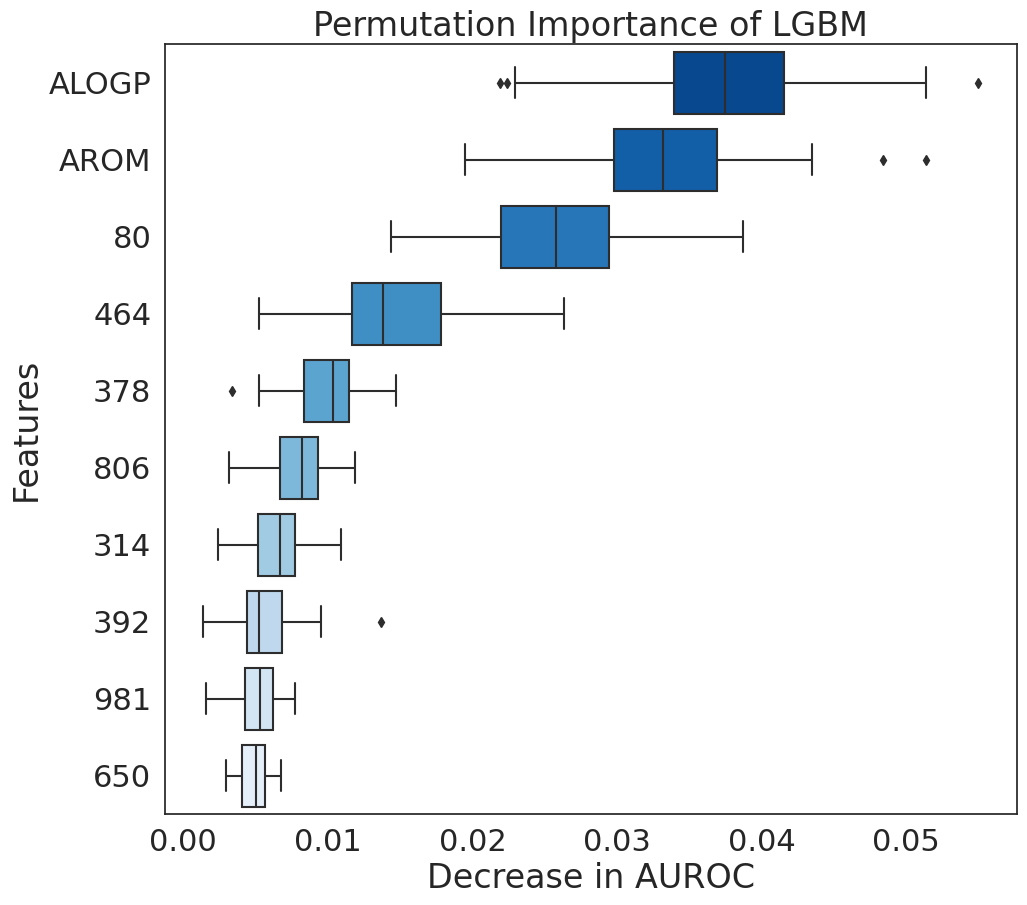

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(rc={'figure.figsize':(11,10)})

sns.set_theme(font_scale=2)
sns.set_style('white')
(sns.boxplot(data=test,orient='h',saturation=1.7,palette='Blues_r')
        .set(title='Permutation Importance of LGBM',
             ylabel='Features', xlabel='Decrease in AUROC'));

plt.show()